In [647]:
import pandas as pd
import numpy as np

dataset_df=pd.read_csv('E:\\Learnings\\AI_ML\\MachineLearning-2\\Advanced_Regression\\dataset\\train.csv')
dataset_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [648]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Imputing missing data

In [649]:
#Getting columns with null values
nan_columns =dataset_df.isna().any()
columnsWithNa=dataset_df.columns[nan_columns].tolist()
print(columnsWithNa)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [650]:
dataset_df.Electrical=dataset_df.Electrical.fillna('NoDataAvail')
dataset_df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'NoDataAvail'],
      dtype=object)

In [651]:

dataset_df.BsmtFinType2=dataset_df.BsmtFinType2.fillna('NoBsmt')
dataset_df.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'NoBsmt', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [652]:

dataset_df.BsmtFinType1=dataset_df.BsmtFinType1.fillna('NoBsmt')
dataset_df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NoBsmt', 'LwQ'], dtype=object)

In [653]:
#imputed LotFrontage with 0 for missing vlaues
dataset_df.LotFrontage= dataset_df.LotFrontage.fillna(0)
dataset_df.LotFrontage.isna().sum()

0

In [654]:
#imputed Alley with NoAlley for missing vlaues
dataset_df.Alley= dataset_df.Alley.fillna('NoAlley')
dataset_df.Alley.isna().sum()

0

In [655]:
dataset_df.MasVnrType=dataset_df.MasVnrType.fillna('None')
dataset_df.MasVnrType.isna().sum()

0

In [656]:
dataset_df.MasVnrArea=dataset_df.MasVnrArea.fillna(0)
dataset_df.MasVnrArea.isna().sum()

0

In [657]:
dataset_df.BsmtQual=dataset_df.BsmtQual.fillna('NoBsmt')
dataset_df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NoBsmt', 'Fa'], dtype=object)

In [658]:
dataset_df.BsmtCond=dataset_df.BsmtCond.fillna('NoBsmt')
dataset_df.BsmtCond.unique()

array(['TA', 'Gd', 'NoBsmt', 'Fa', 'Po'], dtype=object)

In [659]:
dataset_df.BsmtExposure=dataset_df.BsmtExposure.fillna('NoBsmt')
dataset_df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'NoBsmt'], dtype=object)

In [660]:
dataset_df.FireplaceQu=dataset_df.FireplaceQu.fillna('NoFirePlace')
dataset_df.FireplaceQu.unique()


array(['NoFirePlace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [661]:
dataset_df.GarageType=dataset_df.GarageType.fillna('NoGarage')
dataset_df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NoGarage', 'Basment',
       '2Types'], dtype=object)

In [662]:
dataset_df.GarageYrBlt=dataset_df.GarageYrBlt.fillna(0)
dataset_df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,    0., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [663]:
dataset_df.GarageFinish=dataset_df.GarageFinish.fillna('NoGarage')
dataset_df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'NoGarage'], dtype=object)

In [664]:
dataset_df.GarageQual=dataset_df.GarageQual.fillna('NoGarage')
dataset_df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'NoGarage', 'Ex', 'Po'], dtype=object)

In [665]:
dataset_df.GarageCond=dataset_df.GarageCond.fillna('NoGarage')
dataset_df.GarageCond.unique()

array(['TA', 'Fa', 'NoGarage', 'Gd', 'Po', 'Ex'], dtype=object)

In [666]:
dataset_df.PoolQC=dataset_df.PoolQC.fillna('NoPool')
dataset_df.PoolQC.unique()

array(['NoPool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [667]:
dataset_df.Fence=dataset_df.Fence.fillna('NoFence')
dataset_df.Fence.unique()

array(['NoFence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [668]:
dataset_df.MiscFeature=dataset_df.MiscFeature.fillna('NoMiscFeature')
dataset_df.MiscFeature.unique()

array(['NoMiscFeature', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

# Univariate Analysis

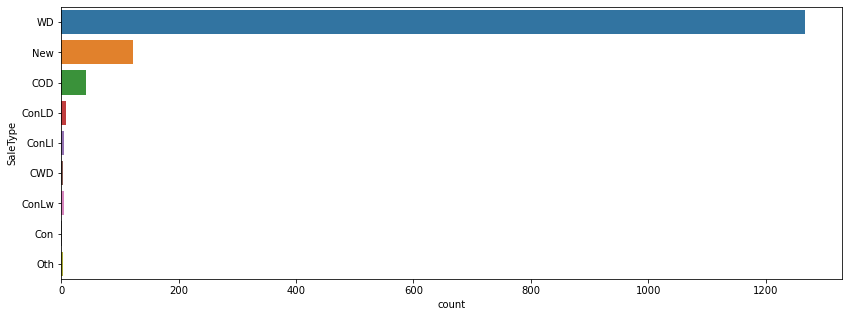

In [426]:
#checking how many house are on different SaleType
plt.figure(figsize=(14,5))
sns.countplot(y="SaleType", data=dataset_df)
plt.show()
# Marjor chunk of the sale is of the type 'Warranty Deed - Conventional'

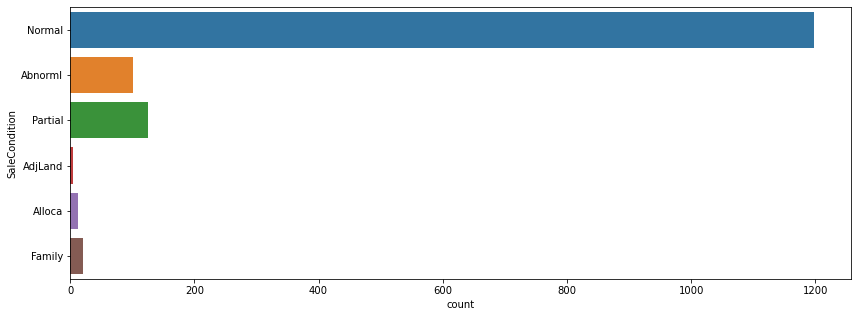

In [427]:
#checking how many house are on different SaleCondition
plt.figure(figsize=(14,5))
sns.countplot(y="SaleCondition", data=dataset_df)
plt.show()
# Marjor chunk of the sale is on 'Normal' sale condition

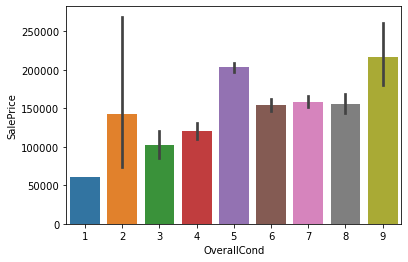

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
plt.figure(figsize=[6,4])
sns.barplot(data=dataset_df, x='OverallCond', y="SalePrice")
plt.show()

### Overall condition of the house has less impact on the SalePrice

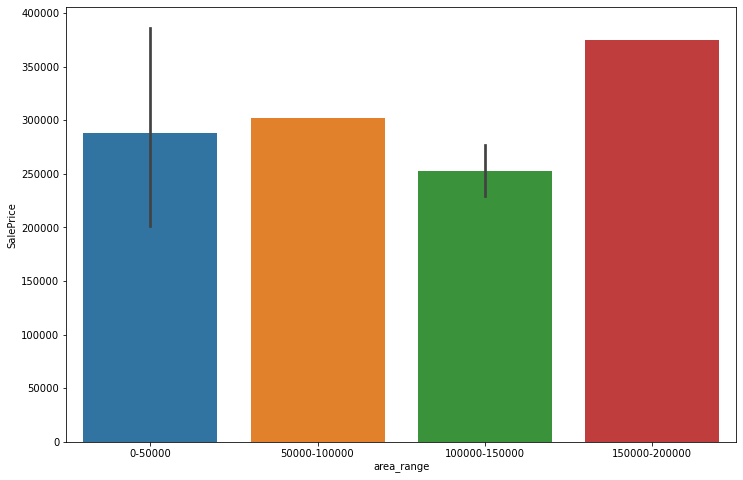

In [379]:
bins = [50000,100000,150000,200000, 250000]
bucket_l = ['0-50000','50000-100000', '100000-150000', '150000-200000']
dataset_df['area_range'] = pd.cut(dataset_df.LotArea, bins, labels=bucket_l)
plt.figure(figsize=[12,8])
sns.barplot(data=dataset_df, x=dataset_df['area_range'], y="SalePrice")
plt.show()

## Checking for outliers

In [380]:
#checking for outliers
num_dataset_df = dataset_df[num_vars]
num_dataset_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5

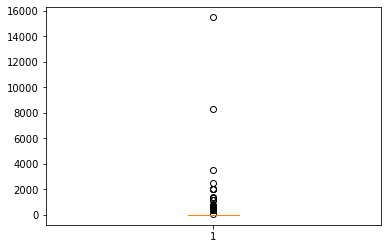

In [381]:
import matplotlib.pyplot as plt    #imports the boxplot library
%matplotlib inline 
plt.boxplot([dataset_df.MiscVal])
plt.show()

In [382]:
pd. set_option("display.max_rows", None)
pd. set_option("display.max_columns", None)
dataset_df[dataset_df.MiscVal > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,area_range
346,347,20,RL,0.0,12772,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498,Unf,0,460,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,1,0,2,1,TA,5,Typ,0,NoFirePlace,Attchd,1960.0,RFn,1,301,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,Gar2,15500,4,2007,WD,Normal,151500,NaN
1230,1231,90,RL,0.0,18890,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NoPool,NoFence,Gar2,8300,8,2007,WD,Normal,190000,NaN


## Though the MicsVal looks like outliers, we are not dropping it as these rows have MiscFeature set to Gar2 which adds value to the SalePrice

# Creating Dummy vairables

In [669]:
ml = pd.get_dummies(dataset_df['SaleType'], prefix='SaleType' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['MiscFeature'], prefix='MiscFeature' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)

ml = pd.get_dummies(dataset_df['Fence'], prefix='Fence' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)

ml = pd.get_dummies(dataset_df['PoolQC'], prefix='PoolQC' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['PavedDrive'], prefix='PavedDrive' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['GarageCond'], prefix='GarageCond' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['GarageQual'], prefix='GarageQual' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['GarageFinish'], prefix='GarageFinish' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['GarageType'], prefix='GarageType' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)


ml = pd.get_dummies(dataset_df['FireplaceQu'], prefix='FireplaceQu' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Functional'], prefix='Functional' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['KitchenQual'], prefix='KitchenQual' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Electrical'], prefix='Electrical' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['CentralAir'], prefix='CentralAir' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['HeatingQC'], prefix='HeatingQC' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Heating'], prefix='Heating' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['BsmtFinType2'], prefix='BsmtFinType2' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['BsmtFinType1'], prefix='BsmtFinType1' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['BsmtExposure'], prefix='BsmtExposure' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['BsmtCond'], prefix='BsmtCond' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['BsmtQual'], prefix='BsmtQual' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Foundation'], prefix='Foundation' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['ExterCond'], prefix='ExterCond' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)

ml = pd.get_dummies(dataset_df['LandSlope'], prefix='LandSlope' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Neighborhood'], prefix='Neighborhood' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Condition1'], prefix='Condition1' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Condition2'], prefix='Condition2' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['BldgType'], prefix='BldgType' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['HouseStyle'], prefix='HouseStyle' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['RoofStyle'], prefix='RoofStyle' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['RoofMatl'], prefix='RoofMatl' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Exterior1st'], prefix='Exterior1st' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Exterior2nd'], prefix='Exterior2nd' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['MasVnrType'], prefix='MasVnrType' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['ExterQual'], prefix='ExterQual' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['SaleCondition'], prefix='SaleCondition' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['SaleCondition'], prefix='SaleCondition' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['MSZoning'], prefix='MSZoning' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Alley'], prefix='Alley' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['LotShape'], prefix='LotShape' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['LandContour'], prefix='LandContour' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Utilities'], prefix='Utilities' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['LotConfig'], prefix='LotConfig' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)
ml = pd.get_dummies(dataset_df['Street'], prefix='Street' , drop_first=True) # 
dataset_df = pd.concat([dataset_df,ml], axis=1)


# Dropping columns
dataset_df= dataset_df.drop(['SaleCondition','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig',
                    'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                            'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                             'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                             'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
                             'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','Street'
                            ], 1)


In [670]:
#Removing area_range and YrSold columns as these columns do not add value in the model
#dataset_df.pop('area_range')
dataset_df.pop('YrSold')

0       2008
1       2007
2       2008
3       2006
4       2008
5       2009
6       2007
7       2009
8       2008
9       2008
10      2008
11      2006
12      2008
13      2007
14      2008
15      2007
16      2010
17      2006
18      2008
19      2009
20      2006
21      2007
22      2008
23      2007
24      2010
25      2009
26      2010
27      2010
28      2006
29      2008
30      2008
31      2008
32      2008
33      2010
34      2007
35      2006
36      2009
37      2009
38      2010
39      2008
40      2006
41      2007
42      2007
43      2008
44      2006
45      2010
46      2009
47      2007
48      2009
49      2007
50      2007
51      2006
52      2010
53      2006
54      2007
55      2008
56      2009
57      2006
58      2006
59      2008
60      2006
61      2007
62      2007
63      2010
64      2009
65      2007
66      2010
67      2007
68      2010
69      2006
70      2007
71      2007
72      2009
73      2010
74      2010
75      2009
76      2008

In [671]:
dataset_df.shape

(1460, 266)

# Create Test and Train data set

In [672]:
import sklearn
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(dataset_df,train_size=0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(1021, 266)
(439, 266)


# Scaling

In [673]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
num_vars=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'
,'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'
,'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF'
,'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']
#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars] = StandardScaler().fit_transform(df_train[num_vars])
df_test[num_vars] = StandardScaler().fit_transform(df_test[num_vars])


# Model Building

In [674]:
#poping out the target variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

# Linear Regression

In [770]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lm=LinearRegression()

lm.fit(X_train,y_train)
y_pred_train=lm.predict(X_train)

y_pred_test = lm.predict(X_test)
metric = []

r2_train_lr = r2_score(y_train,y_pred_train)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_pred_test)
metric.append(r2_test_lr)

rss_lr = np.sum(np.square(y_train-y_pred_train))
metric.append(rss_lr)
mse_train_lr = mean_squared_error(y_train,y_pred_train)
metric.append(mse_train_lr **0.5)
print(metric)

[0.9530235461863992, -1.0025476807788216, 299796987268.71844, 17135.65702542981]


# Checking for error terms if they are normally distributed

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

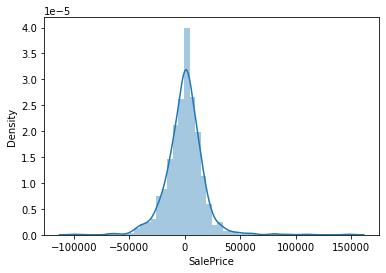

In [732]:
res = y_train - y_pred_train
sns.distplot(res)

# Creating comparission Metrix

In [774]:
lr_table={'Metric':['R2 Train','R2 Test','RSS Train','MSE Train'],'Linear Regression':metric}
lr_metric = pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])
lr_metric

,Metric,Linear Regression
0,R2 Train,9.530235e-01
1,R2 Test,-1.002548e+00
2,RSS Train,2.997970e+11
3,MSE Train,1.713566e+04


# Feature selection

In [577]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

rss_values=[]

i=50
while i<=200:
    logreg = Ridge()
    rfe = RFE(logreg,i) #limiting the number of features to 15. so it selects 15 top features
    rfe = rfe.fit(X_train,y_train)
    cols = X_train.columns[rfe.support_]
    #X_train_sm=sm.add_constant(X_train[cols])

    params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100,500,1000]}
    ridge = Ridge()
    folds = 5
    model_cv= GridSearchCV(estimator = ridge, param_grid=params,scoring='neg_mean_absolute_error', cv= folds,
                          return_train_score=True, verbose =1)
    model_cv.fit(X_train[cols],y_train)

    alpha = model_cv.best_params_
    ridge.fit(X_train[cols],y_train)
    y_pred_train=ridge.predict(X_train[cols])
    y_pred_test = ridge.predict(X_test[cols])
    rss_rd = np.sum(np.square(y_train-y_pred_train))
    i=i+25
    rss_values.append(rss_rd)
print(rss_values)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
[1058474007765.0391, 1002412287862.1743, 916892134830.1299, 785602777445.9193, 737591393086.9215, 689566141876.9778, 658868584083.8308]


### In the above step we have calcuated RSS for 50,75,100,125,150,175,200.
### After 150 variables, there is no much change in the RSS value. So considering top 150 variables to build the Ridge model

In [723]:
logreg = Ridge()
rfe = RFE(logreg,150) #limiting the number of features to 15. so it selects 15 top features
rfe = rfe.fit(X_train,y_train)
cols = X_train.columns[rfe.support_]

# Not using RFE to exclude columns as it did not help in fixing the overfitting

# Ridge Regression

In [797]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100,500,1000]}
ridge = Ridge()
folds = 5
model_cv= GridSearchCV(estimator = ridge, param_grid=params,scoring='neg_mean_absolute_error', cv= folds,
                      return_train_score=True, verbose =1)
model_cv.fit(X_train,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 50.0}


In [812]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
alpha = 50 #model_cv.best_params_
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
#print(ridge.coef_)
y_pred_train=ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
metric=[]
r2_train_rd = r2_score(y_train,y_pred_train)
metric.append(r2_train_rd)
r2_test_rd = r2_score(y_test,y_pred_test)
metric.append(r2_test_rd)
rss_rd = np.sum(np.square(y_train-y_pred_train))
metric.append(rss_rd)
mse_train_rd = mean_squared_error(y_train,y_pred_train)
metric.append(mse_train_rd **0.5)
print(metric)

[0.8702906313115206, 0.8672826999112975, 827786578093.6187, 28473.85828054613]


In [801]:
rg_metric = pd.Series(metric,name='Ridge Reg')

# Checking if Error terms are normally distributed

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

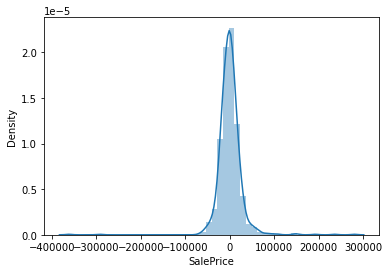

In [722]:
res = y_train - y_pred_train
sns.distplot(res)

# Lasso Regression

In [809]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
lasso = Lasso()
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100,200,300,500,1000]}

folds = 5
model_cv= GridSearchCV(estimator = lasso, param_grid=params,scoring='neg_mean_absolute_error', cv= folds,
                      return_train_score=True, verbose =1)
model_cv.fit(X_train,y_train)
print(model_cv.best_params_)
alpha = model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 100}


In [811]:
alpha = 300 #model_cv.best_params_
lasso = Lasso(alpha = alpha )
lasso.fit(X_train,y_train)
y_pred_train=lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
metric2 = []
r2_train_rd = r2_score(y_train,y_pred_train)
metric2.append(r2_train_rd)
r2_test_rd = r2_score(y_test,y_pred_test)
metric2.append(r2_test_rd)
rss_rd = np.sum(np.square(y_train-y_pred_train))
metric2.append(rss_rd)
mse_train_rd = mean_squared_error(y_train,y_pred_train)
metric2.append(mse_train_rd **0.5)
print(metric2)




[0.8790634460486542, 0.847468391190473, 771799733311.8656, 27494.095765645492]


In [803]:
ls_metric = pd.Series(metric2,name='Lasso Reg')

# Checking if the error terms are normally distributed

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

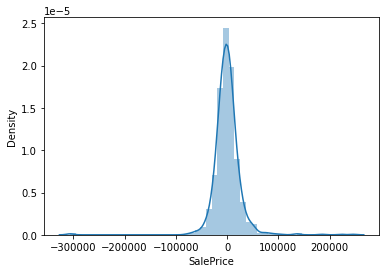

In [718]:
res = y_train - y_pred_train
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

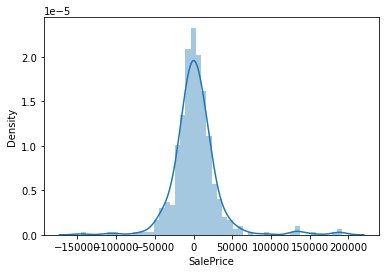

In [719]:
res = y_test - y_pred_test
sns.distplot(res)

# Comparing the co-effecients

In [779]:
final_metric = pd.concat([lr_metric,rg_metric,ls_metric],axis=1)
final_metric

,Metric,Linear Regression,Ridge Reg,Lasso Reg
0,R2 Train,9.530235e-01,8.702906e-01,8.790634e-01
1,R2 Test,-1.002548e+00,8.672827e-01,8.474684e-01
2,RSS Train,2.997970e+11,8.277866e+11,7.717997e+11
3,MSE Train,1.713566e+04,2.847386e+04,2.749410e+04


In [804]:
betas=pd.DataFrame(index=X_test.columns)
betas.rows=X_test.columns
betas['Ridge']=ridge.coef_
betas['Lasso']=lasso.coef_
betas

,Ridge,Lasso
Id,-1.386123,-1.002485e+00
MSSubClass,-5667.257352,-6.642880e+03
LotFrontage,-441.278885,-1.338598e+02
LotArea,3170.259193,3.061619e+03
OverallQual,16877.670555,2.097818e+04
OverallCond,4926.228661,4.806045e+03
YearBuilt,4857.491931,8.368162e+03
YearRemodAdd,2993.211016,3.038550e+03
MasVnrArea,5630.110230,3.478692e+03
BsmtFinSF1,1945.116744,2.920725e+00


In [805]:
betas1=betas
betas1.Ridge=betas1.Ridge.apply(lambda x:abs(x))
betas1.sort_values(['Ridge'],ascending=False)

,Ridge,Lasso
OverallQual,16877.670555,2.097818e+04
GrLivArea,12100.804607,2.546081e+04
BsmtQual_Gd,10459.052185,-1.443133e+04
Neighborhood_NoRidge,9436.303173,2.504154e+04
2ndFlrSF,9128.619003,0.000000e+00
Neighborhood_NridgHt,8497.290152,1.719608e+04
BsmtExposure_Gd,8183.396031,1.075575e+04
GarageCars,8177.599302,9.945824e+03
Condition1_Norm,7644.167466,1.006818e+04
KitchenQual_Gd,7357.719997,-7.432672e+03


In [821]:
betas2=betas
betas2.Lasso=betas1.Lasso.apply(lambda x:abs(x))
betas2.sort_values(['Lasso'],ascending=False)

,Ridge,Lasso
GrLivArea,2.546081e+04,2.546081e+04
Neighborhood_NoRidge,2.504154e+04,2.504154e+04
OverallQual,2.097818e+04,2.097818e+04
Neighborhood_NridgHt,1.719608e+04,1.719608e+04
BsmtQual_Gd,1.443133e+04,1.443133e+04
BsmtExposure_Gd,1.075575e+04,1.075575e+04
Condition1_Norm,1.006818e+04,1.006818e+04
GarageCars,9.945824e+03,9.945824e+03
YearBuilt,8.368162e+03,8.368162e+03
KitchenQual_Gd,7.432672e+03,7.432672e+03


# Dropping the top 5 variables of the Lasso model and rebuilding the model

In [816]:
X_train1=X_train.drop(['GrLivArea','Neighborhood_NoRidge','OverallQual','Neighborhood_NridgHt','BsmtExposure_Gd'],axis=1)
X_test1=X_test.drop(['GrLivArea','Neighborhood_NoRidge','OverallQual','Neighborhood_NridgHt','BsmtExposure_Gd'],axis=1)

In [817]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
lasso = Lasso()
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100,200,300,500,1000]}

folds = 5
model_cv= GridSearchCV(estimator = lasso, param_grid=params,scoring='neg_mean_absolute_error', cv= folds,
                      return_train_score=True, verbose =1)
model_cv.fit(X_train1,y_train)
print(model_cv.best_params_)
alpha = model_cv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'alpha': 100}


In [820]:
alpha = 300 #model_cv.best_params_
lasso = Lasso(alpha = alpha )
lasso.fit(X_train1,y_train)
y_pred_train=lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)
metric2 = []
r2_train_rd = r2_score(y_train,y_pred_train)
metric2.append(r2_train_rd)
r2_test_rd = r2_score(y_test,y_pred_test)
metric2.append(r2_test_rd)
rss_rd = np.sum(np.square(y_train-y_pred_train))
metric2.append(rss_rd)
mse_train_rd = mean_squared_error(y_train,y_pred_train)
metric2.append(mse_train_rd **0.5)
print(metric2)


[0.8706758227300457, 0.8149017183632562, 825328341734.3184, 28431.548149900595]


In [823]:
betas3=pd.DataFrame(index=X_test1.columns)
betas3.rows=X_test1.columns
betas3['Lasso']=lasso.coef_
betas3.Lasso=betas3.Lasso.apply(lambda x:abs(x))
betas3.sort_values(['Lasso'],ascending=False)

,Lasso
PoolQC_Gd,195978.600262
Condition2_PosN,38494.171198
2ndFlrSF,28362.373828
BsmtQual_Gd,24105.376492
KitchenQual_Gd,21601.557078
1stFlrSF,20776.744890
KitchenQual_TA,19405.720126
Neighborhood_Edwards,16165.272799
BsmtQual_TA,15779.090192
Neighborhood_Crawfor,15021.974021
